In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns

# Generate random data

## Class A

In [8]:
class_a_x = np.random.randint(0,30,100)
class_a_y = np.random.randint(1,101,100)

## Class B

In [9]:
class_b_x = np.random.randint(40,60,10)
class_b_y = np.random.randint(1,101,10)

# Create dataframe

In [10]:
data = {'class': ['A']*100 + ['B']*10, 'x': np.concatenate([class_a_x, class_b_x]), 'y': np.concatenate([class_a_y, class_b_y])}

df = pd.DataFrame(data)
df

,class,x,y
0,A,26,79
1,A,24,92
2,A,21,94
3,A,29,31
4,A,11,64
...,...,...,...
105,B,43,30
106,B,49,49
107,B,58,16
108,B,46,8


<Axes: xlabel='x', ylabel='y'>

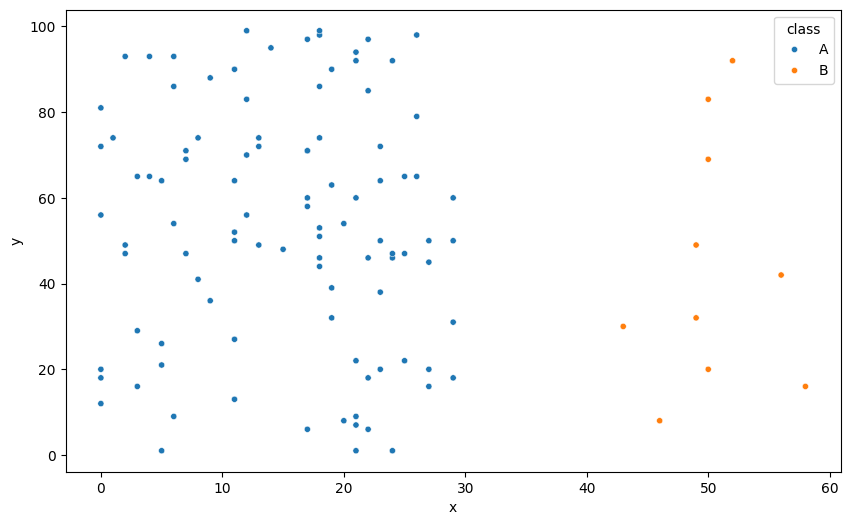

In [11]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df, x='x', y='y', s=20, hue='class')

# Generating data using SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

## Initialize SMOTE

In [13]:
smote = SMOTE(sampling_strategy = 1)

In [14]:
data = df[['x', 'y']]
target = df['class']

## Generate synthetic samples

In [15]:
data_smote, target_smote = smote.fit_resample(data, target)

## Assemble new Dataframe

In [16]:
df_smote = pd.concat([data_smote, target_smote], axis=1)

## Data characterization

In [17]:
print(f'Before OverSampling, the shape of data: {data.shape}')
print(f'Before OverSampling, the shape of target: {target.shape}')
print('---')
print(f'After OverSampling, the shape of data: {data_smote.shape}')
print(f'After OverSampling, the shape of target: {target_smote.shape}')
print('---//---')
df_class_values = df['class'].value_counts()
print(f"Before OverSampling, count of label 'A': {df_class_values.get('A')}")
print(f"Before OverSampling, count of label 'B': {df_class_values.get('B')}")
print('---')
df_class_values = df_smote['class'].value_counts()
print(f"After OverSampling, count of label 'A': {df_class_values.get('A')}")
print(f"After OverSampling, count of label 'B': {df_class_values.get('B')}")

Before OverSampling, the shape of data: (110, 2)
Before OverSampling, the shape of target: (110,)
---
After OverSampling, the shape of data: (200, 2)
After OverSampling, the shape of target: (200,)
---//---
Before OverSampling, count of label 'A': 100
Before OverSampling, count of label 'B': 10
---
After OverSampling, count of label 'A': 100
After OverSampling, count of label 'B': 100


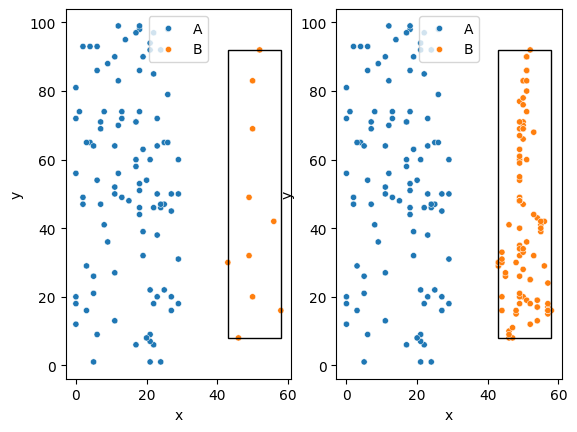

In [18]:
fig, axs = plt.subplots(1,2)

sns.scatterplot(data=df, x='x', y='y', s=20, hue='class', ax=axs[0])
sns.scatterplot(data=df_smote, x='x', y='y', s=20, hue='class', ax=axs[1])

# limits of the rectangle
df_b = df[df['class'] =='B']
x_min = df_b['x'].min()
x_max = df_b['x'].max()
y_min = df_b['y'].min()
y_max = df_b['y'].max()

width = x_max - x_min
height = y_max - y_min

for ax in axs:
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.legend(loc='upper center')

# Generate data using Random Oversampling

# Generate data using Random Undersampling